[Keras](https://keras.io/)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [10]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [11]:
model = tf.keras.applications.MobileNet()

In [12]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [13]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    print(img_array.shape)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    print(img_array_expanded_dims.shape)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
# List of all 1000 categories from ImageNet Competition

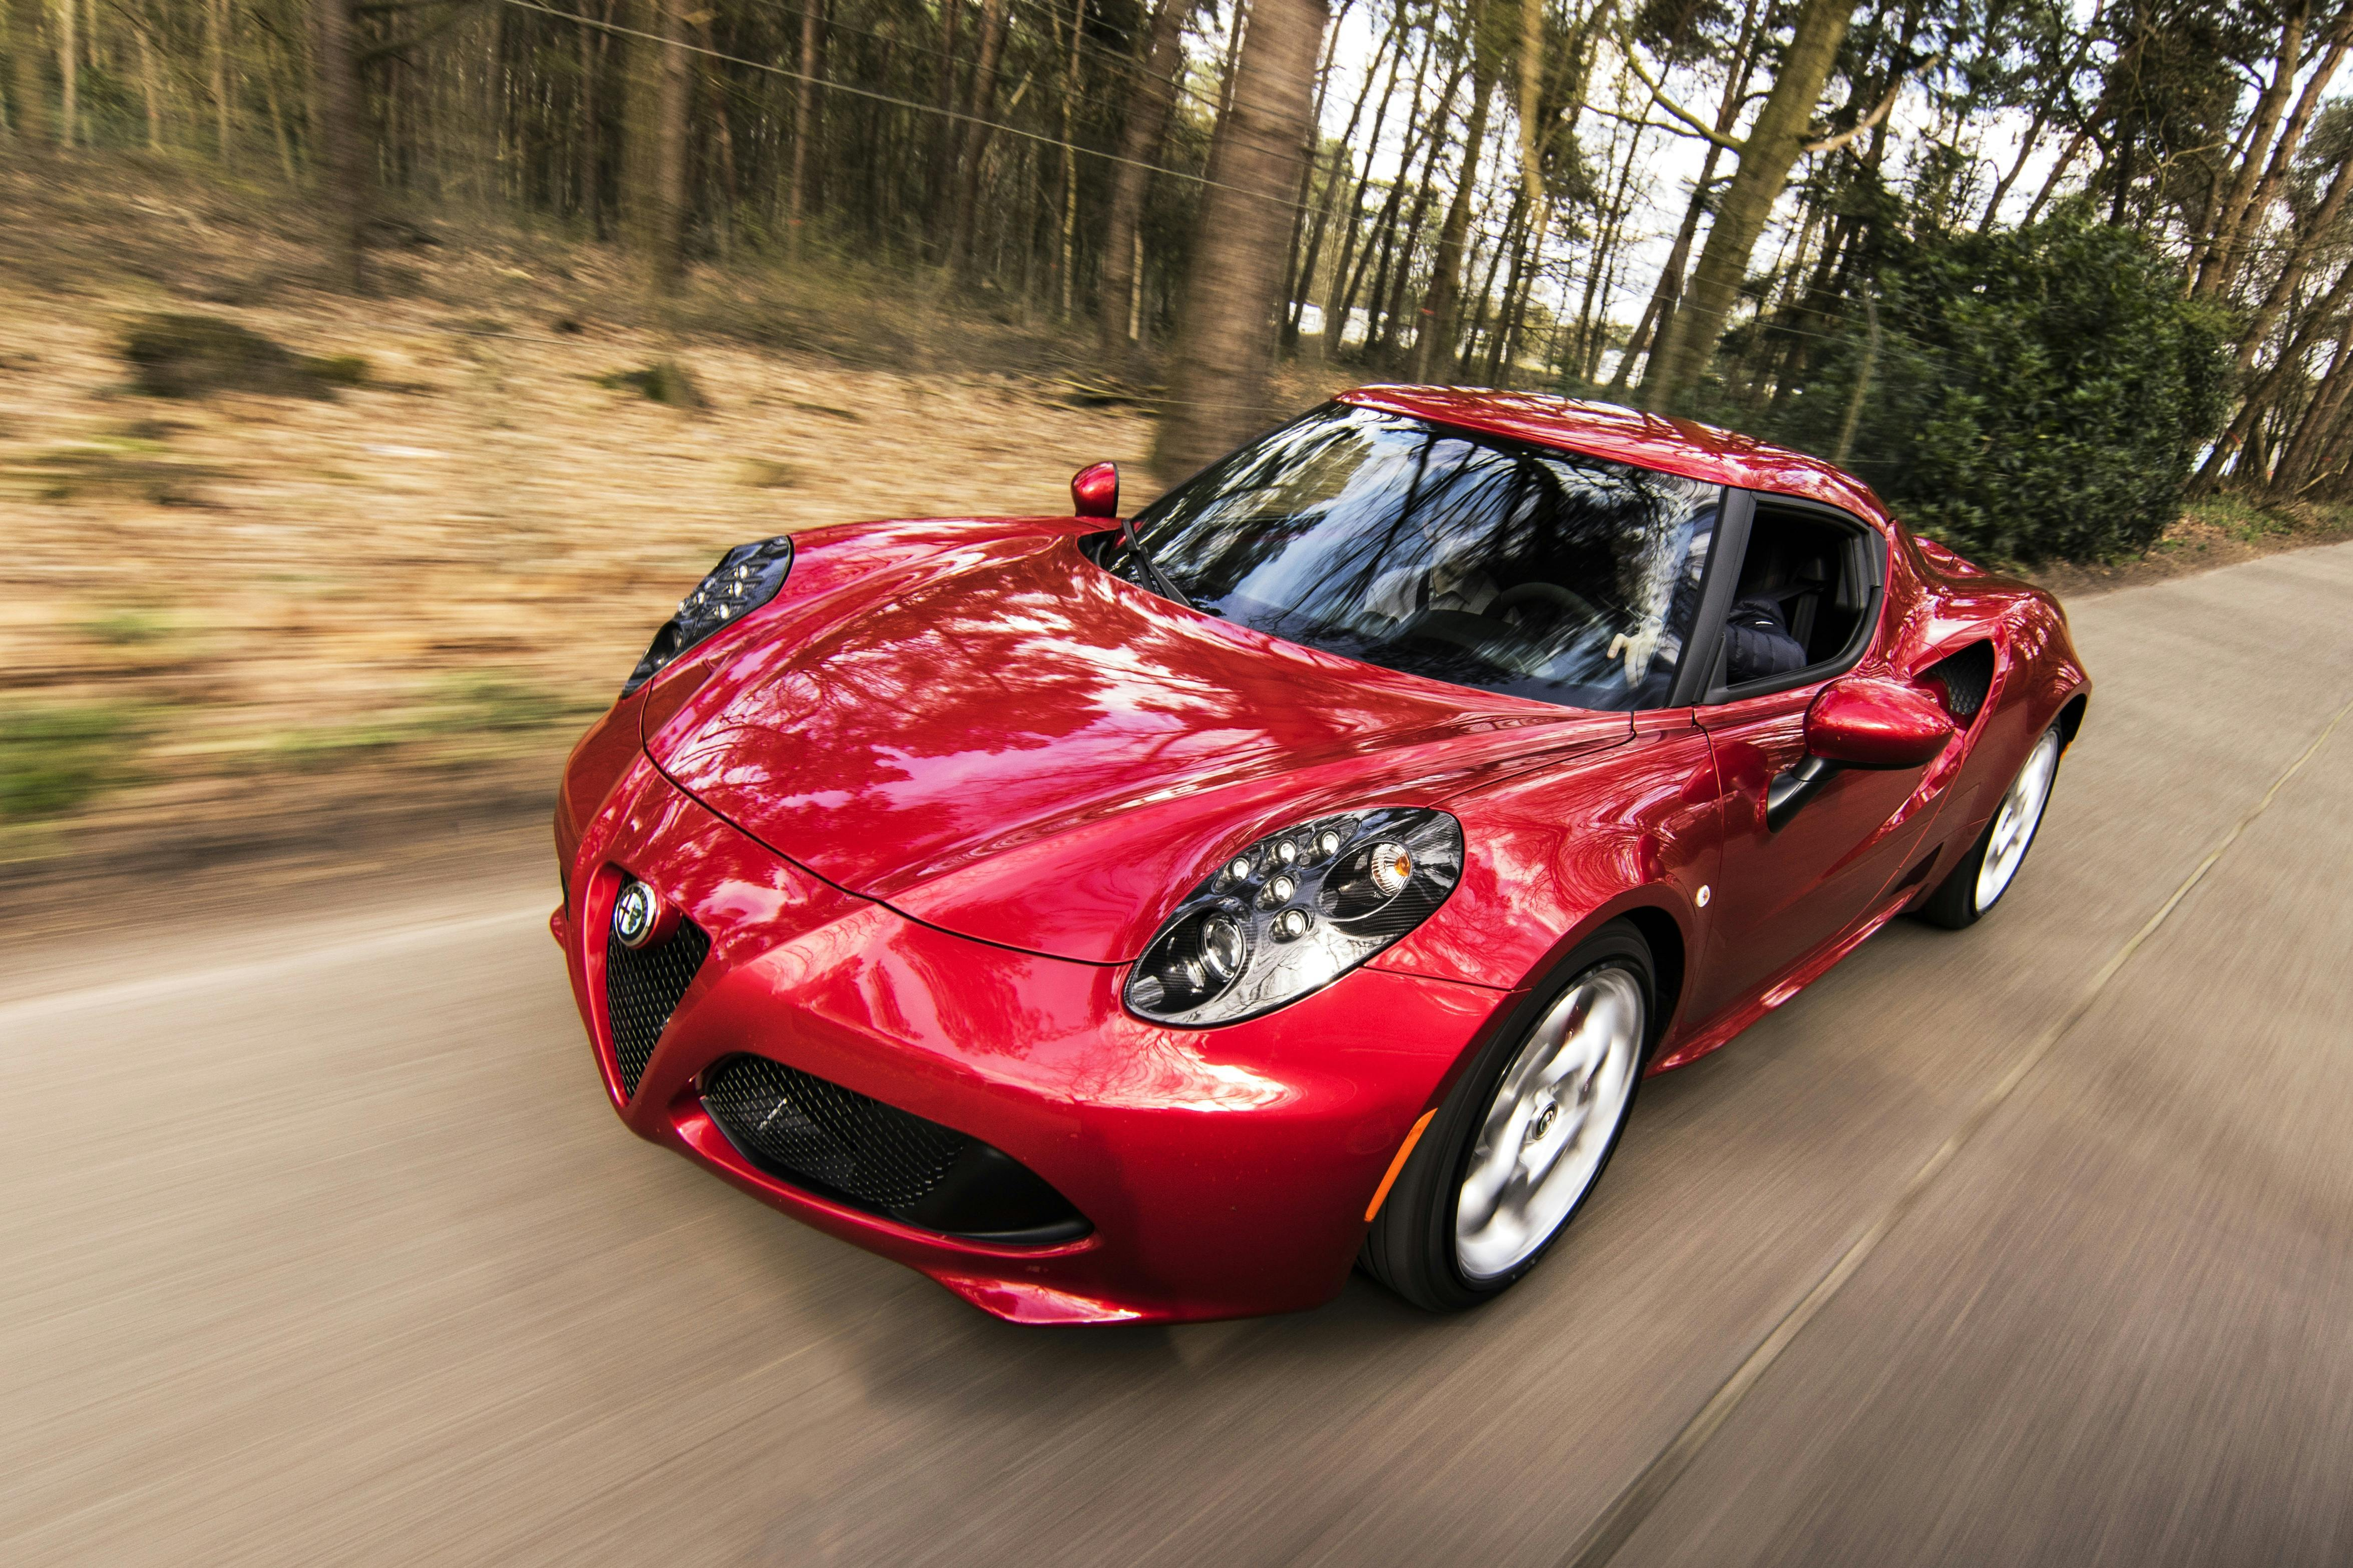

In [14]:
Image(filename='car1.jpg', width=300,height=200)

In [15]:
preprocessed_image = prepare_image('car1.jpg')
predictions = model.predict(preprocessed_image)

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [16]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04285008', 'sports_car', 0.9316774),
  ('n04037443', 'racer', 0.06370776),
  ('n02974003', 'car_wheel', 0.001825501),
  ('n03100240', 'convertible', 0.0015801166),
  ('n03930630', 'pickup', 0.0005371438)]]

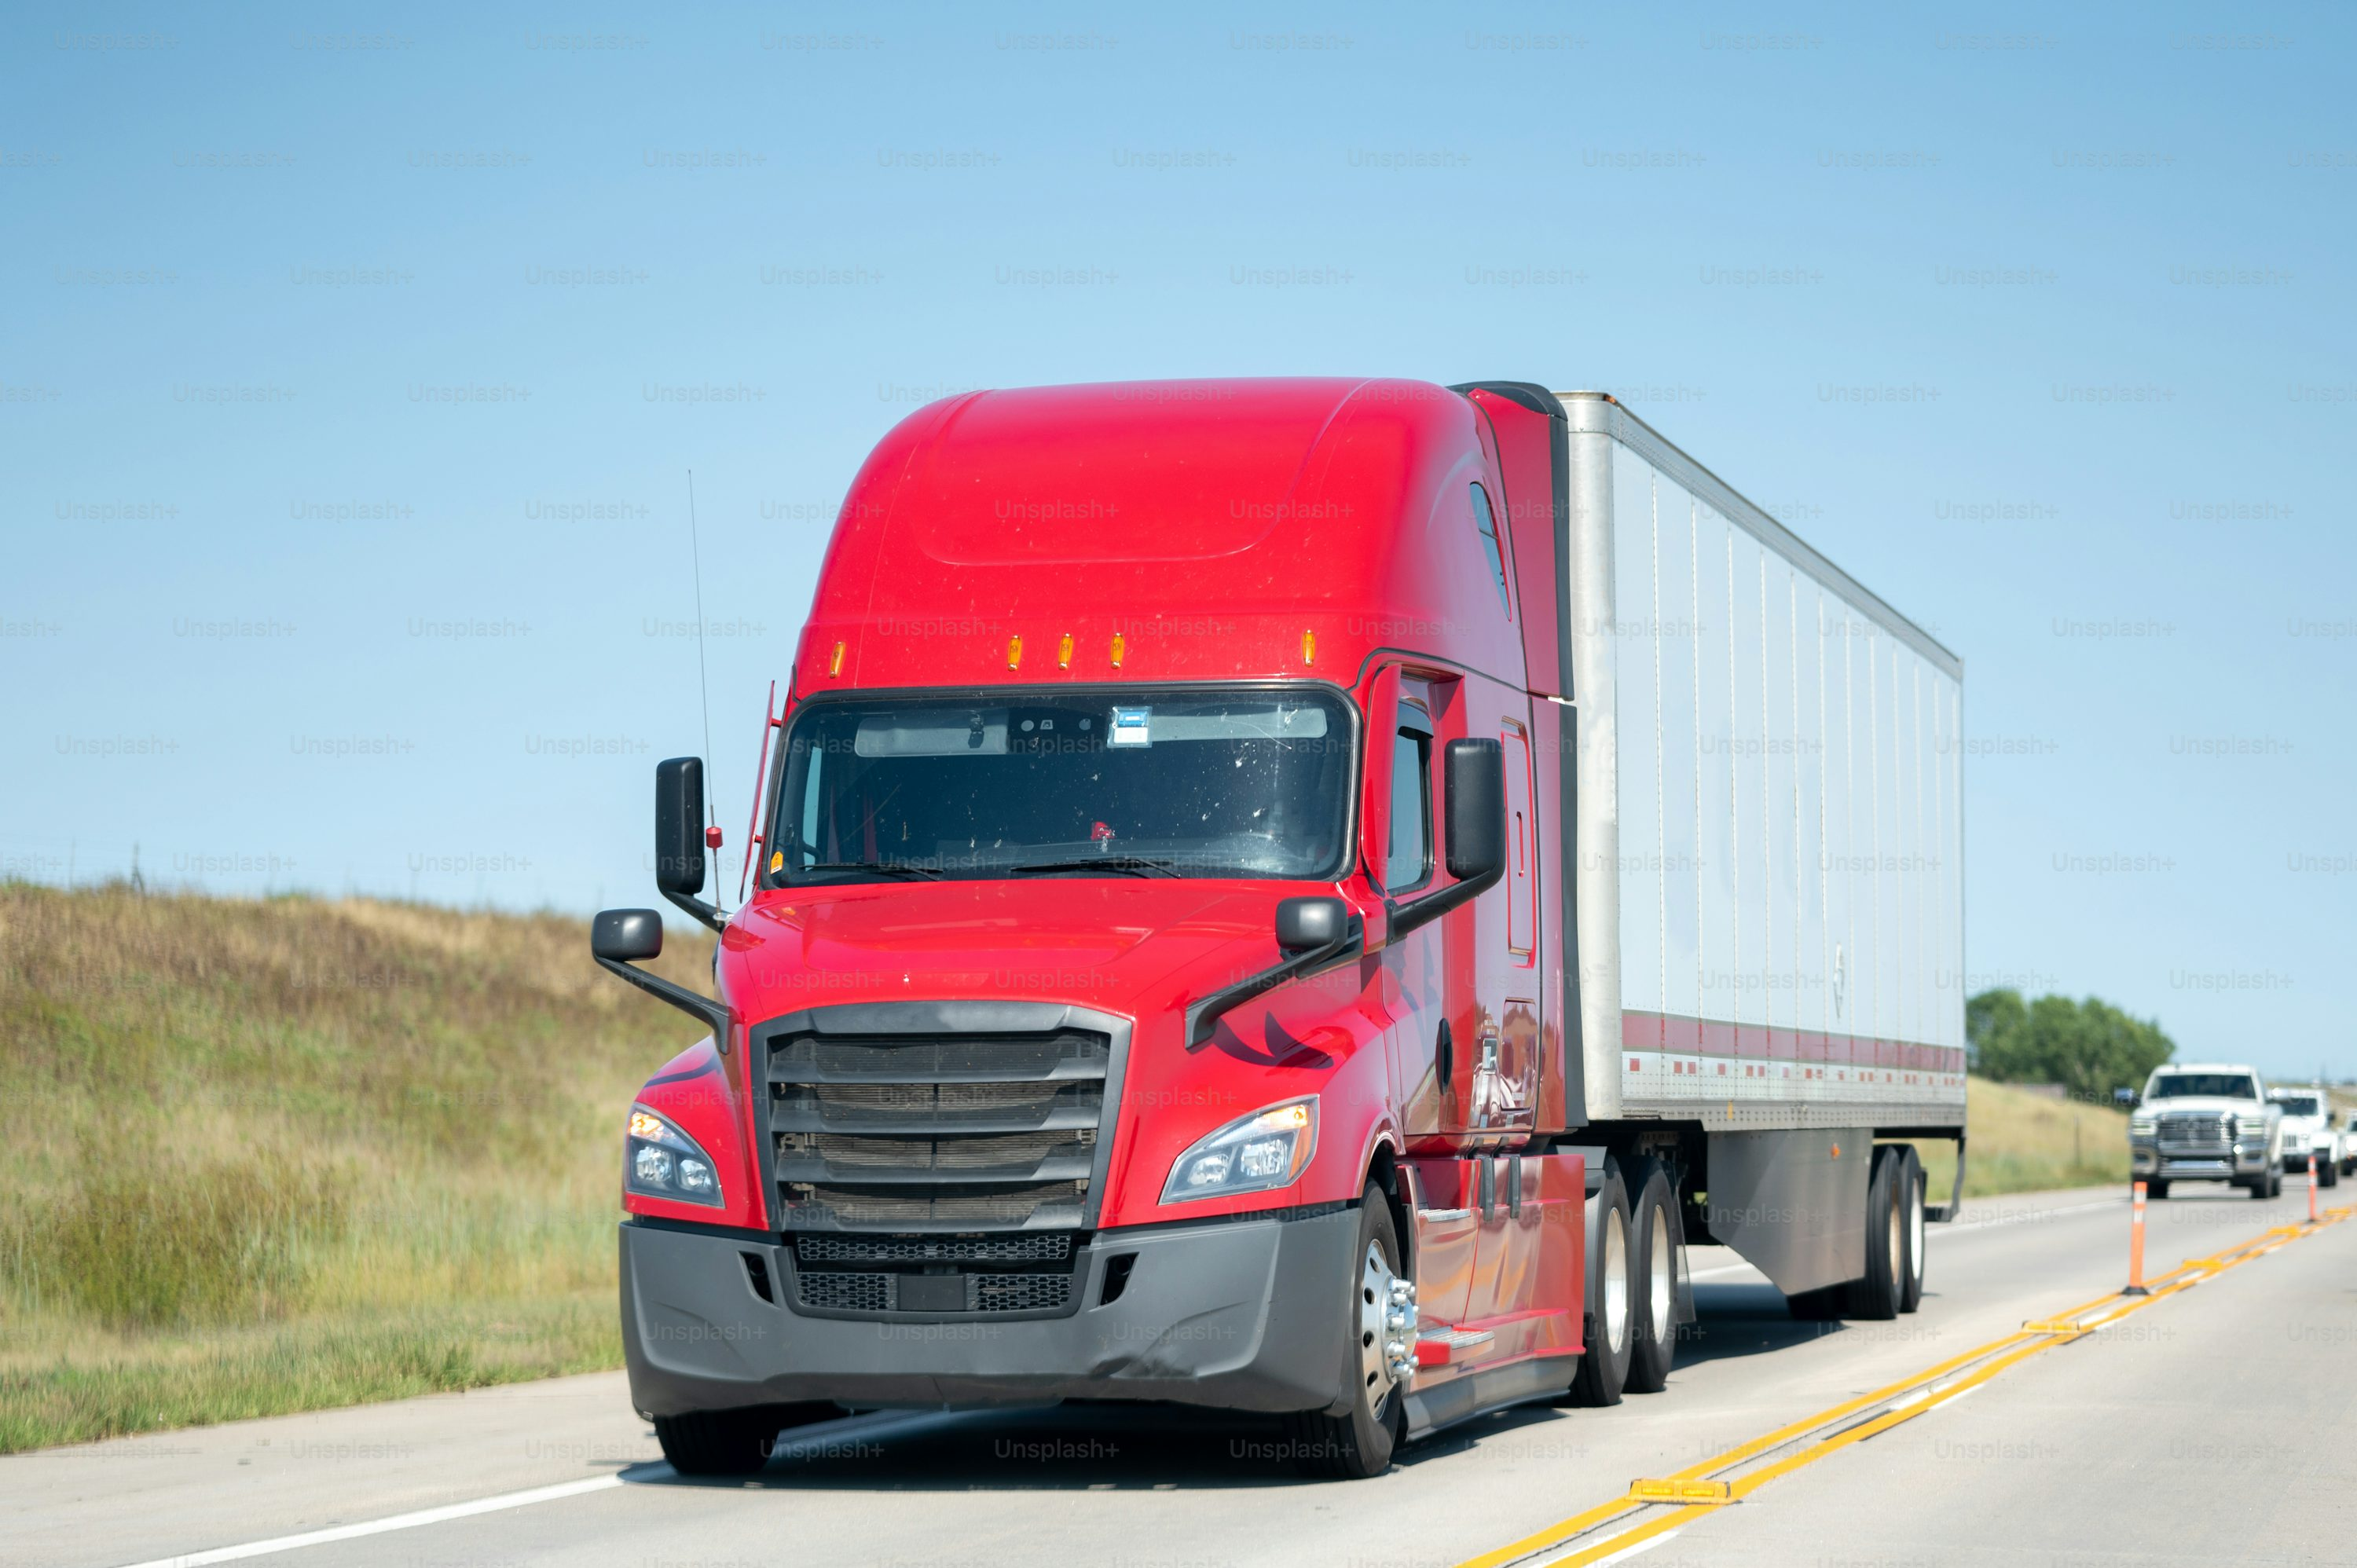

In [17]:
Image(filename='truck1.jpg', width=300,height=200)

In [20]:
preprocessed_image = prepare_image('truck1.jpg')
predictions = model.predict(preprocessed_image)

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [21]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04467665', 'trailer_truck', 0.97859585),
  ('n03796401', 'moving_van', 0.018346835),
  ('n04146614', 'school_bus', 0.001094192),
  ('n03496892', 'harvester', 0.0004204758),
  ('n03417042', 'garbage_truck', 0.00038279608)]]

In [2]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'streamlit'

In [ ]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 class indices
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Filter data for 'Automobile' (cars: class 1) and 'Truck' (class 9)
selected_classes = [1, 9]
train_filter = np.isin(y_train, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Update labels to binary (0: Car, 1: Truck)
y_train = (y_train == 9).astype(int)
y_test = (y_test == 9).astype(int)

# Resize images to 224x224 for MobileNet
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [1]:

# Load pre-trained MobileNet without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


NameError: name 'MobileNet' is not defined

In [3]:
def compile_and_train_binary_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    return history



NameError: name 'model' is not defined

In [4]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'model' is not defined